<a href="https://colab.research.google.com/github/Edmout/Analise-de-Dados-e-Boas-Praticas/blob/main/MVP%20Analise%20de%20Dados%20Eduardo%20Moutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Aluno: Eduardo Moutinho dos Reis



## 1 - Definição do problema


O problema abordado no dataset escolhido é prever se um cliente irá subscrever um produto de depósito a prazo com base em características demográficas e comportamentais. O objetivo é identificar clientes que estão mais propensos a aceitar uma oferta de produto, permitindo que o banco direcione suas campanhas de marketing de forma mais eficaz. Trata-se de um problema de aprendizado supervisionado, pois temos uma variável alvo (ou rótulo) que indica se o cliente aceitou ou não a oferta (representada pela variável "y"). O modelo poderá ser treinado usando exemplos rotulados para prever novos casos.

Algumas premissas sobre o problema são:

 - Os atributos disponíveis (demográficos e comportamentais) têm impacto na decisão do cliente.

 - A relação entre os atributos e a aceitação da oferta é suficientemente forte para que um modelo preditivo possa ser treinado com sucesso.

 - O comportamento passado dos clientes pode ser um bom indicativo de suas decisões futuras.

 - A distribuição dos dados é representativa da população-alvo do banco.


As condições ou restrições que podem ter sido consideradas na seleção dos dados incluem:

 - Exclusão de clientes que não foram contatados nas campanhas.

 - Limitação a um determinado período de tempo em que os dados foram coletados.

 - Foco em clientes que forneceram consentimento para serem contatados.

 - Seleção de clientes que atendem a critérios demográficos ou de renda específicos


O dataset usado neste projeto será o Marketing bancário (bank.csv) relacionado com campanhas de marketing direto baseadas em telefonemas de uma instituição bancária portuguesa. Este dataset é um subconjunto do dataset original com 10% dos exemplos e 17 entradas, selecionadas aleatoriamente do arquivo original. O dataset apresenta diversos atributos relacionados a dados dos clientes e uma variável de classe binária (0 ou 1). As variáveis ​​preditoras incluem idade, nível de escolaridade, se tem empréstimo habitacional e assim por diante. Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/dataset/222/bank+marketing

Informações sobre os atributos:

1.	**age**: Idade do cliente (numérico).
2.	**job**: Tipo de trabalho do cliente (categórico: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "student", "technician", "services", "unemployed", "unknown").
3.	**marital**: Estado civil do cliente (categórico: "divorced", "married", "single", "unknown").
4.	**education**: Nível de educação do cliente (categórico: "primary", "secondary", "tertiary", "unknown").
5.	**default**: Se o cliente possui ou não crédito em atraso (categórico: "yes", "no").
6.	**balance**: Saldo bancário do cliente (numérico).
7.	**housing**: Se o cliente possui ou não um empréstimo habitacional (categórico: "yes", "no").
8.	**loan**: Se o cliente possui ou não um empréstimo pessoal (categórico: "yes", "no").
9.	**contact**: Tipo de comunicação usada para contatar o cliente (categórico: "cellular", "telephone").
10.	**day**: Último dia do mês em que o cliente foi contatado (numérico).
11.	**month**: Último mês em que o cliente foi contatado (categórico: "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec").
12.	**duration**: Duração da última chamada em segundos (numérico).
13.	**campaign**: Número de contatos realizados durante esta campanha para o mesmo cliente (numérico).
14.	**pdays**: Número de dias desde o último contato com o cliente (numérico; 999 indica que o cliente não foi contatado).
15.	**previous**: Número de contatos realizados antes desta campanha (numérico).
16.	**poutcome**: Resultado da campanha anterior (categórico: "failure", "success", "nonexistent").
17.	**y**: Variável alvo que indica se o cliente aceitou ou não a oferta (categórico: "yes", "no").


In [11]:
# Importando as bibliotecas necessárias para executar o notebook
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2 - Carga de Dados

### *Carga do Dataset*

Realizando a carga do dataset bank e exibindo as primeiras linhas

In [12]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
#url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"

#url="https://github.com/Edmout/Analise-de-Dados-e-Boas-Praticas/blob/main/bank.csv"

# Informa o cabeçalho das colunas
#colunas = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Lê o arquivo utilizando as colunas informadas
#dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

# Mostra as primeiras linhas do dataset
#dataset.head()


# Importação do dataset
#breast_cancer = load_breast_cancer()

# Caso deseje fazer a carga do dataset a partir do GitHub
# Informa a URL de importação do dataset
#url_dados = 'https://raw.githubusercontent.com/Edmout/Machine-Learning-MVP/68b20efd0e8480943729580ae21595b2c1280151/wdbc.data'

# labels dos atributos do dataset
#labels_atributos = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#       'mean smoothness', 'mean compactness', 'mean concavity',
#       'mean concave points', 'mean symmetry', 'mean fractal dimension',
#       'radius error', 'texture error', 'perimeter error', 'area error',
#       'smoothness error', 'compactness error', 'concavity error',
#       'concave points error', 'symmetry error', 'fractal dimension error',
#       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
#       'worst smoothness', 'worst compactness', 'worst concavity',
#       'worst concave points', 'worst symmetry', 'worst fractal dimension']

# carga do dataset através do csv
#dataset = pd.read_csv(url_dados, names=labels_atributos)

#dataset = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) # conversão para dataframe
#dataset['target'] = breast_cancer.target # adição da coluna target

# Mostra as primeiras linhas do dataset
#dataset.head()


# 3) Importando dados de um arquivo .csv local
# carga do dataset através de um arquivo
filename = "bank-full.csv" # este arquivo deve estar dentro da aba "Arquivos" do Colab
#filename="https://github.com/Edmout/Analise-de-Dados-e-Boas-Praticas/blob/main/bank.csv"

# Informa o cabeçalho das colunas
colunas = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(filename, names=colunas, skiprows=1, delimiter=';')

#bank = pd.read_csv(filename,skiprows=1) # se o cabeçalho estiver sendo importado como dados, use o parâmetro skiprows = 1 na função read_csv

# verifica o tipo de iris
#print(type(bank))

# exibe as 5 primeiras linhas
dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3 - Análise de Dados

### 3.1 - Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [13]:
# Visualizando o número de linhas e colunas do dataset
dataset.shape

(45211, 17)

In [14]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [15]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Ao visualizar as primeiras linhas do dataset já é possível notar algumas colunas como job e education que têm valores categóricos que incluem a categoria "unknown". O atributo pdays tem muitos valores -1, indicando que o cliente não foi contatado anteriormente.

In [16]:
# Verificando se há valores faltantes
valores_faltantes = dataset.isnull().sum()
print("\nValores faltantes em cada coluna:")


Valores faltantes em cada coluna:


Não há valores faltantes no dataset, contudo já verificamos anteriomente possíveis inconsistências, devido a presença de valores "unknown".

In [17]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [18]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [19]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Podemos perceber que o saldo médio pode ser impactado por alguns outliers (clientes com saldo muito alto) e o atributo duration pode ter uma grande variação, refletindo a natureza das chamadas de venda

Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que a variável y que contém as classes que definem se o cliente subscreveu um depósito a prazo com os valores yes (cliente subscreveu um depósito a prazo) e no (cliente não subscreveu um depósito a prazo) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [20]:
# distribuição das classes
print(dataset.groupby('y').size())

y
no     39922
yes     5289
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para atributos quantitativos do dataset. Veremos que o atributo age sugere uma distribuição aproximadamente normal, o atributo day tem uma distribuição mais uniforme, enquanto os demais sugerem um distribuição mais exponencial ou assimétrica.

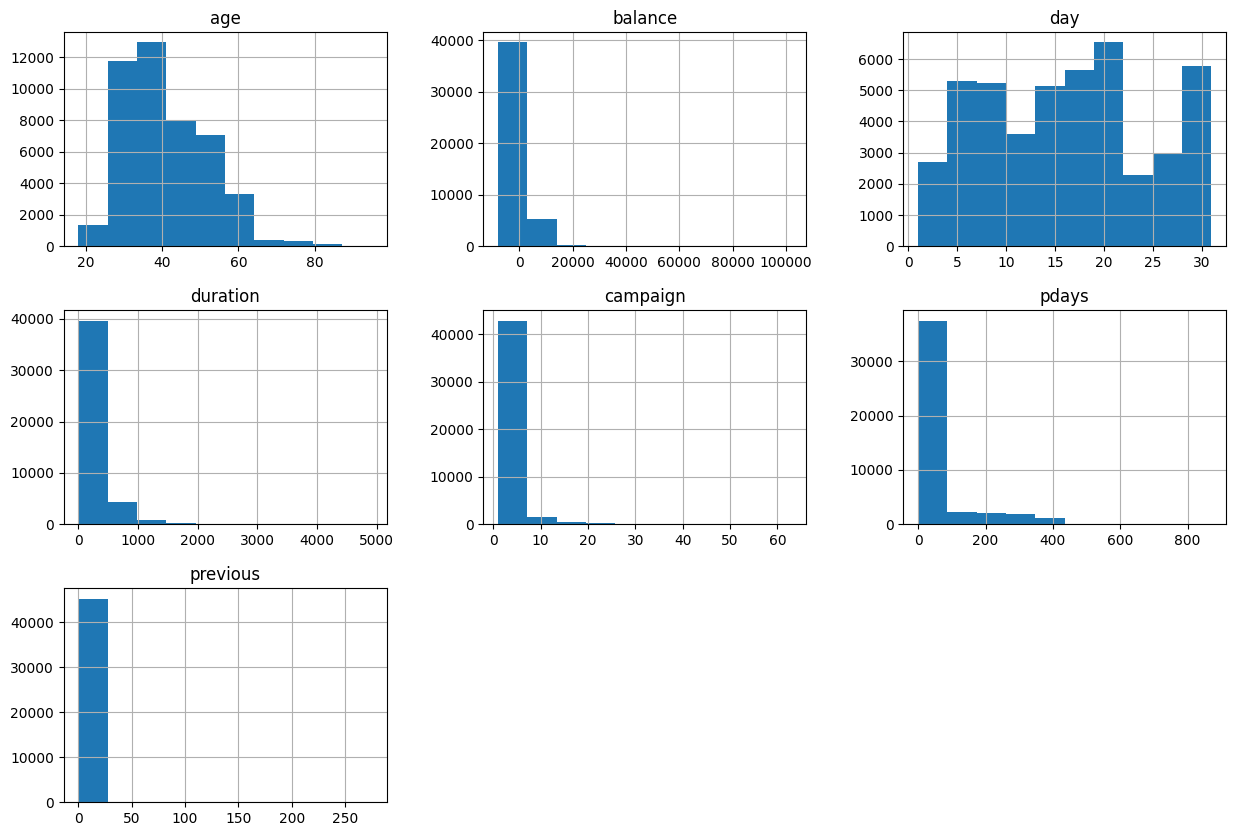

In [21]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

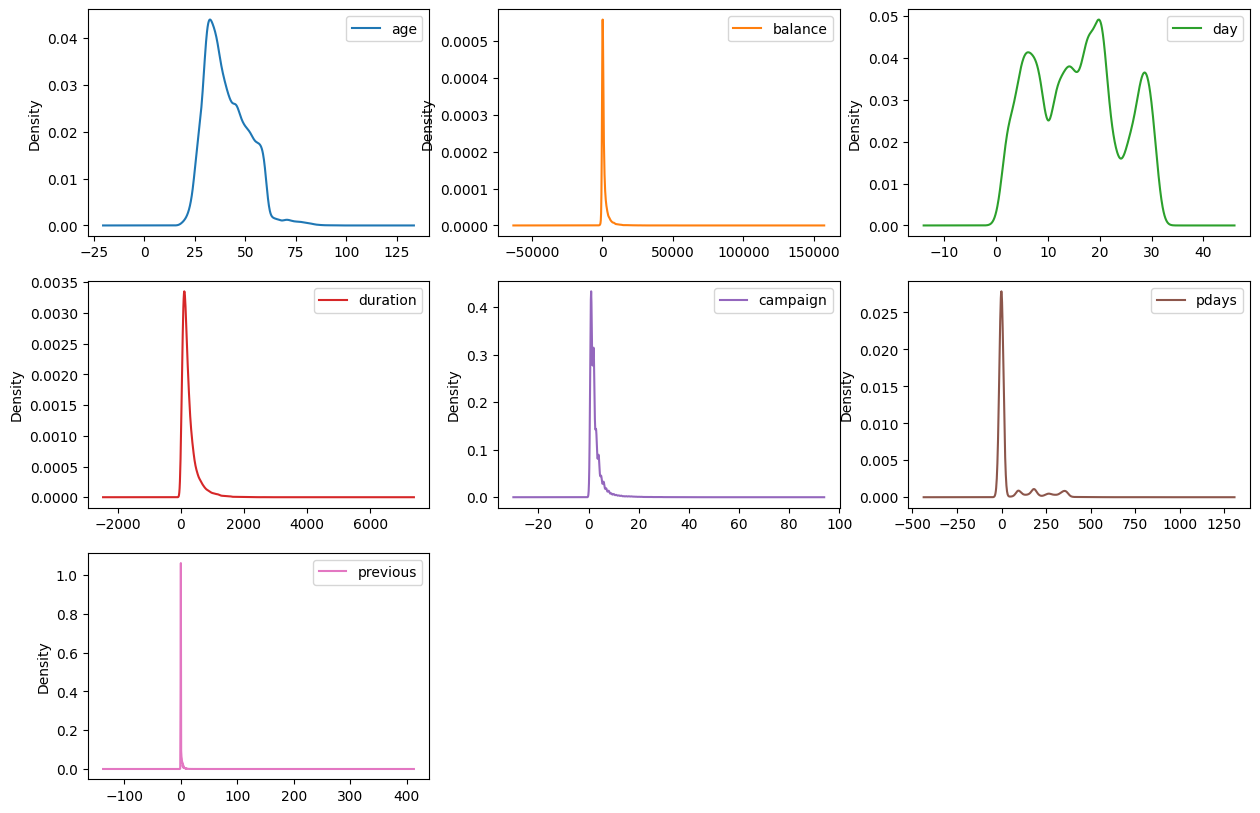

In [22]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

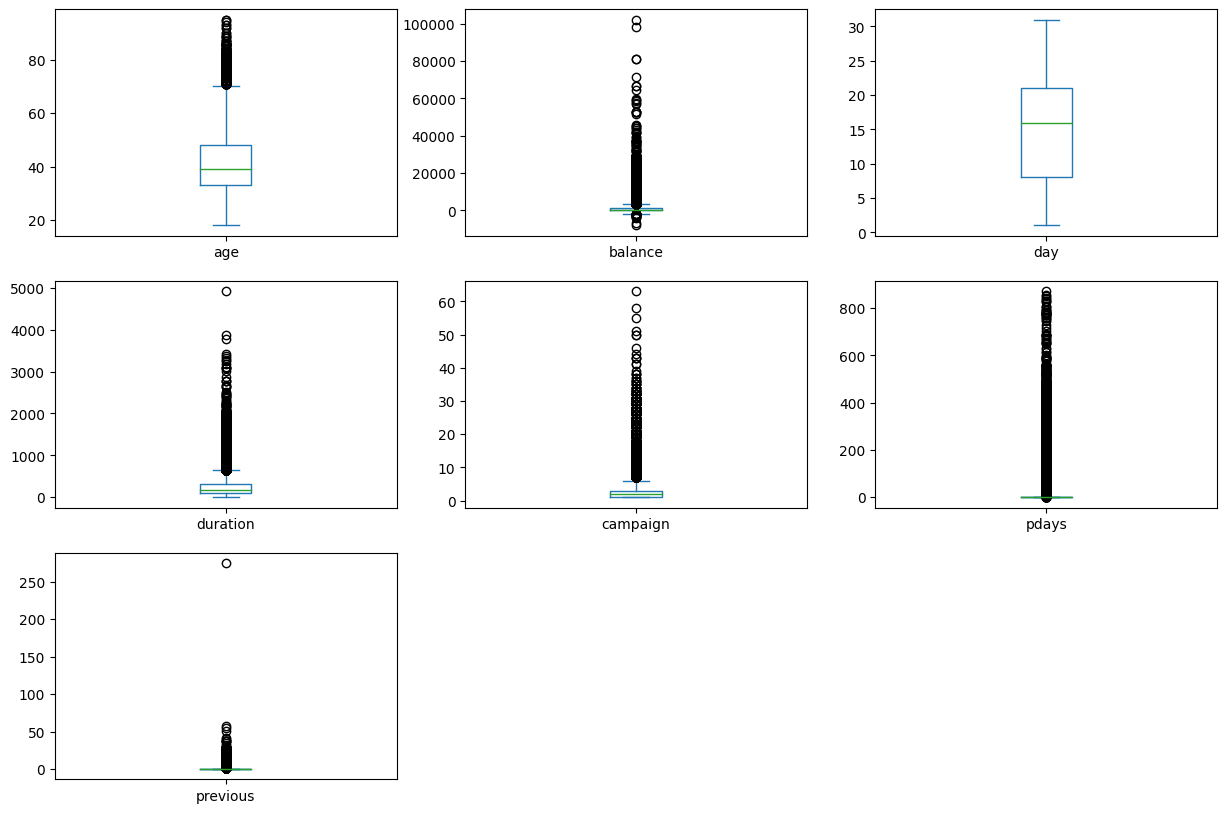

In [23]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

In [24]:
# Matriz de Correlação com Matplotlib Seaborn
#sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');



# Calcular a matriz de correlação
correlation_matrix = dataset.corr()

# Criar um gráfico de calor (heatmap) para a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()




ValueError: could not convert string to float: 'management'

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

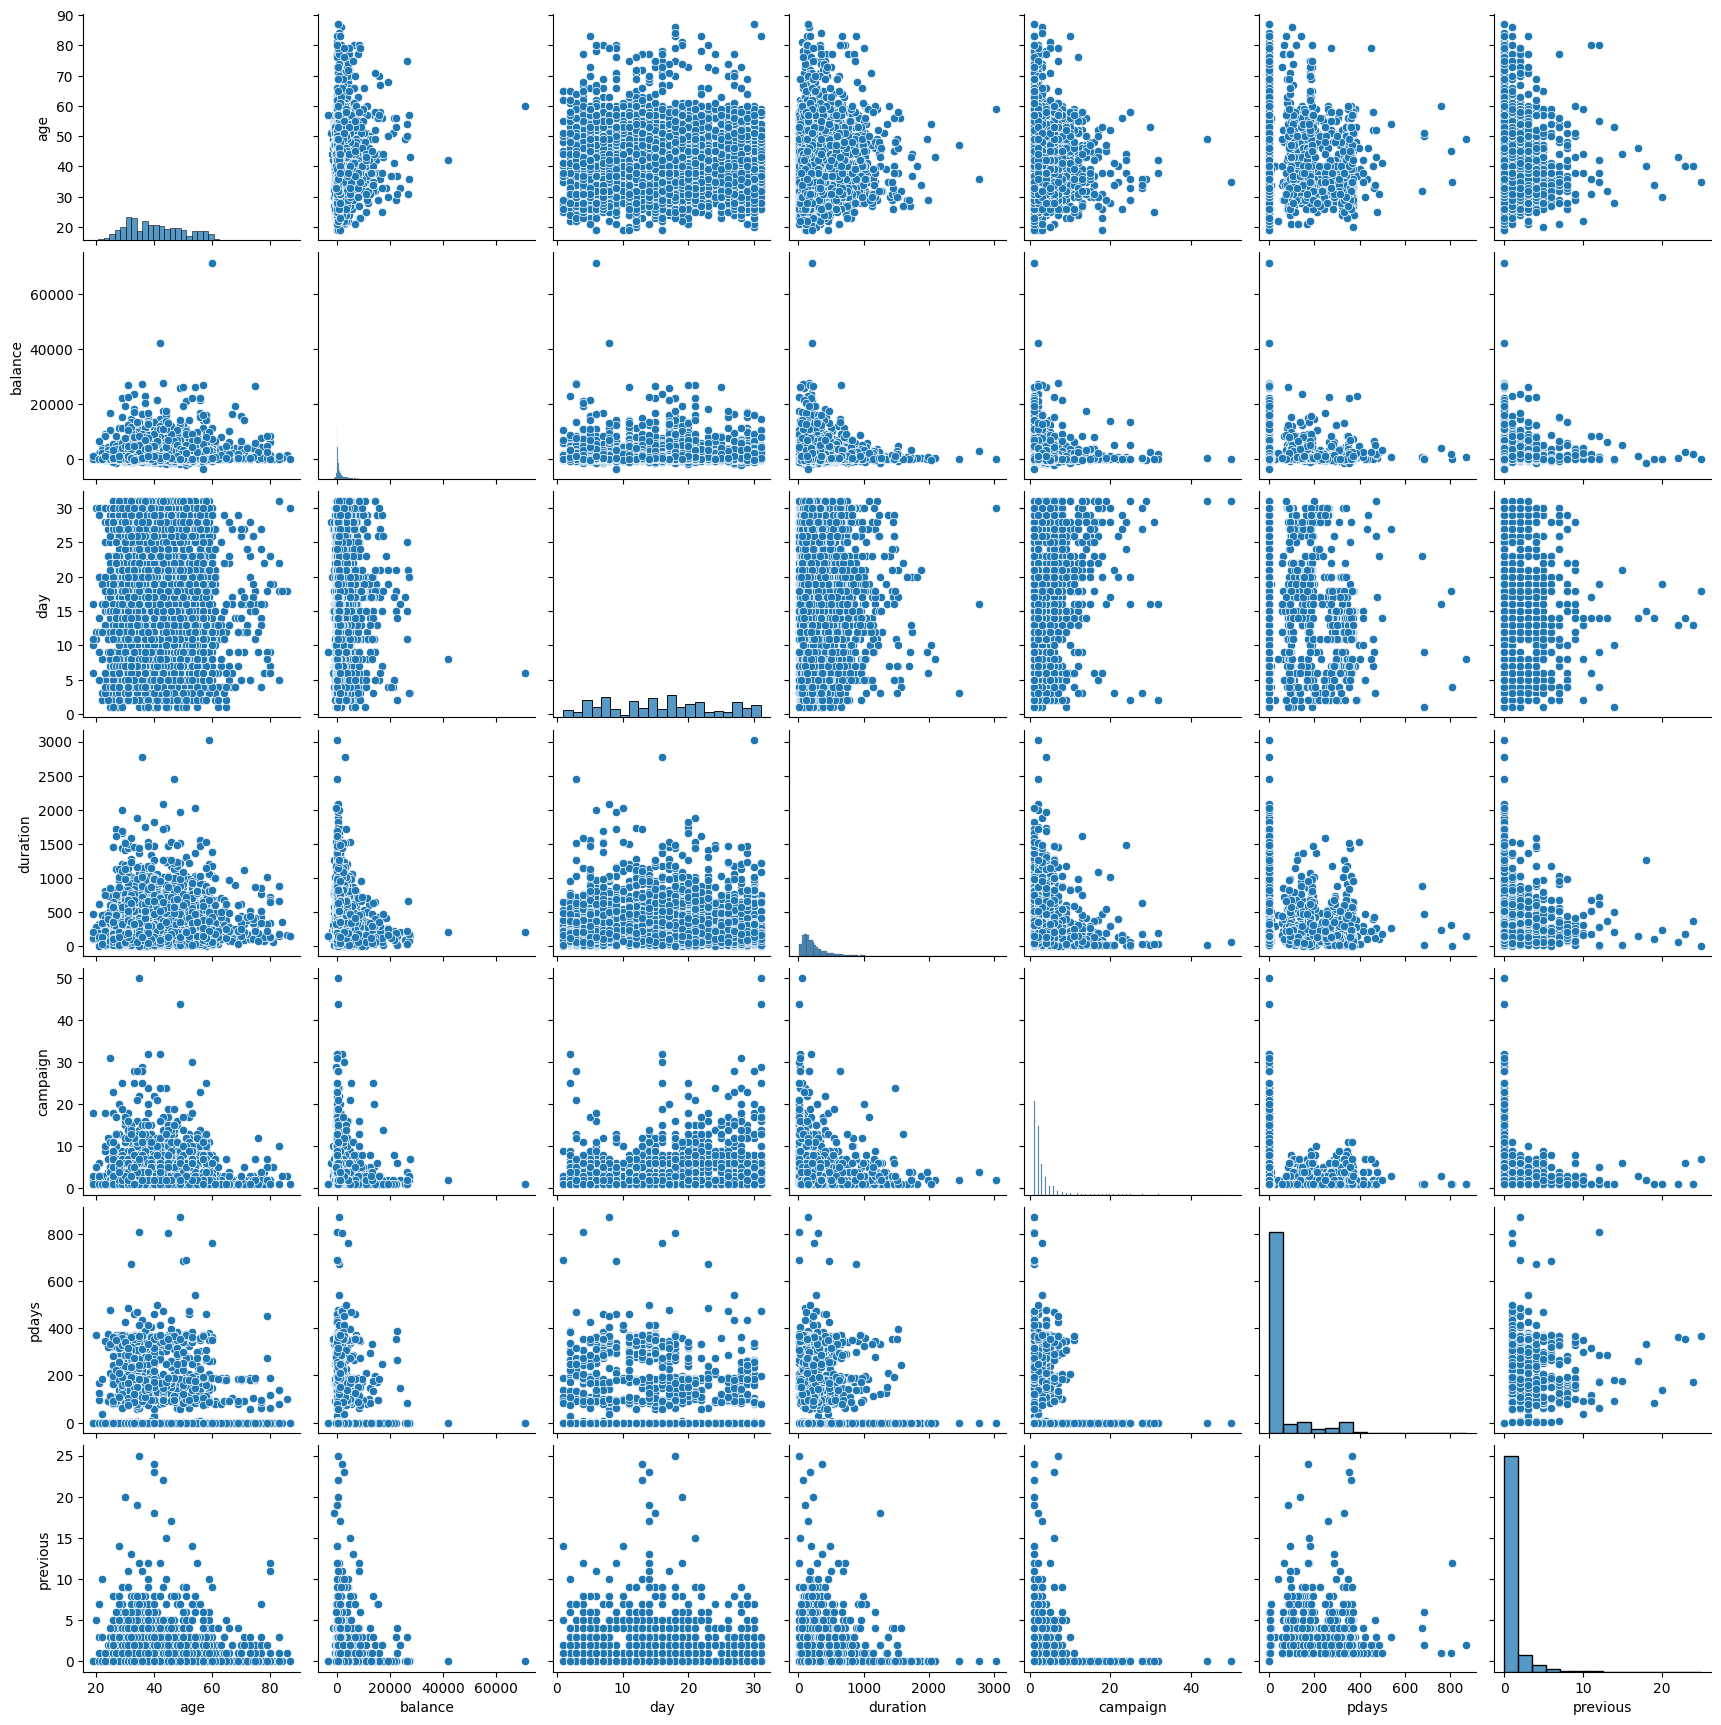

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

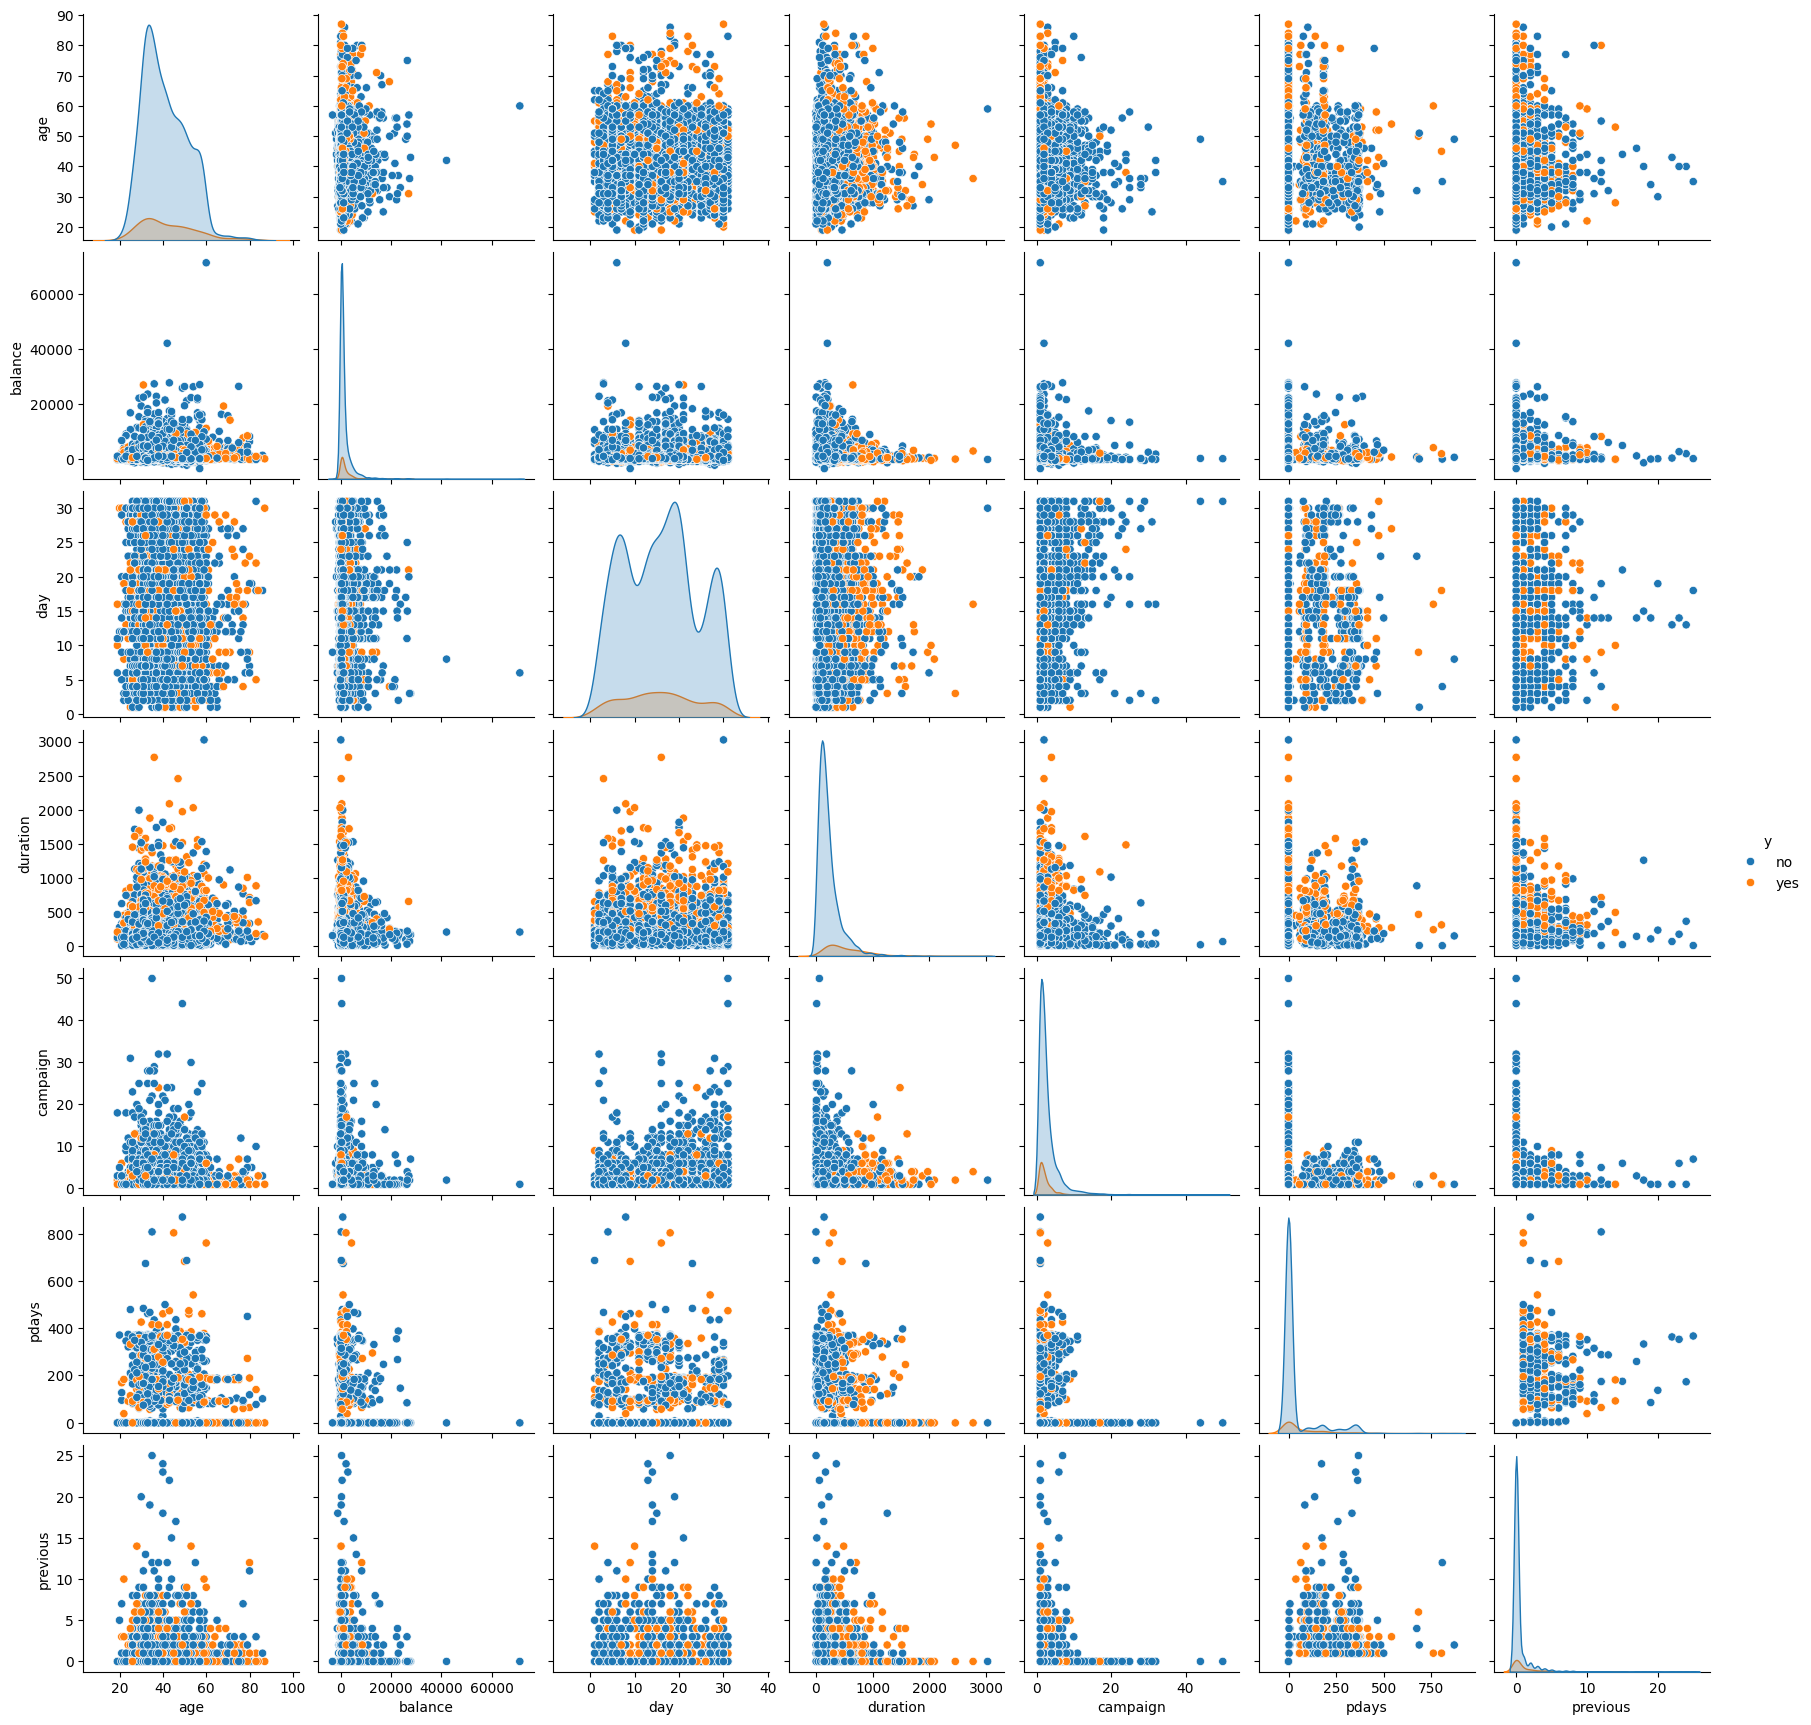

In [ ]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "y", height = 2.5);

## 4 - Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


<Axes: >

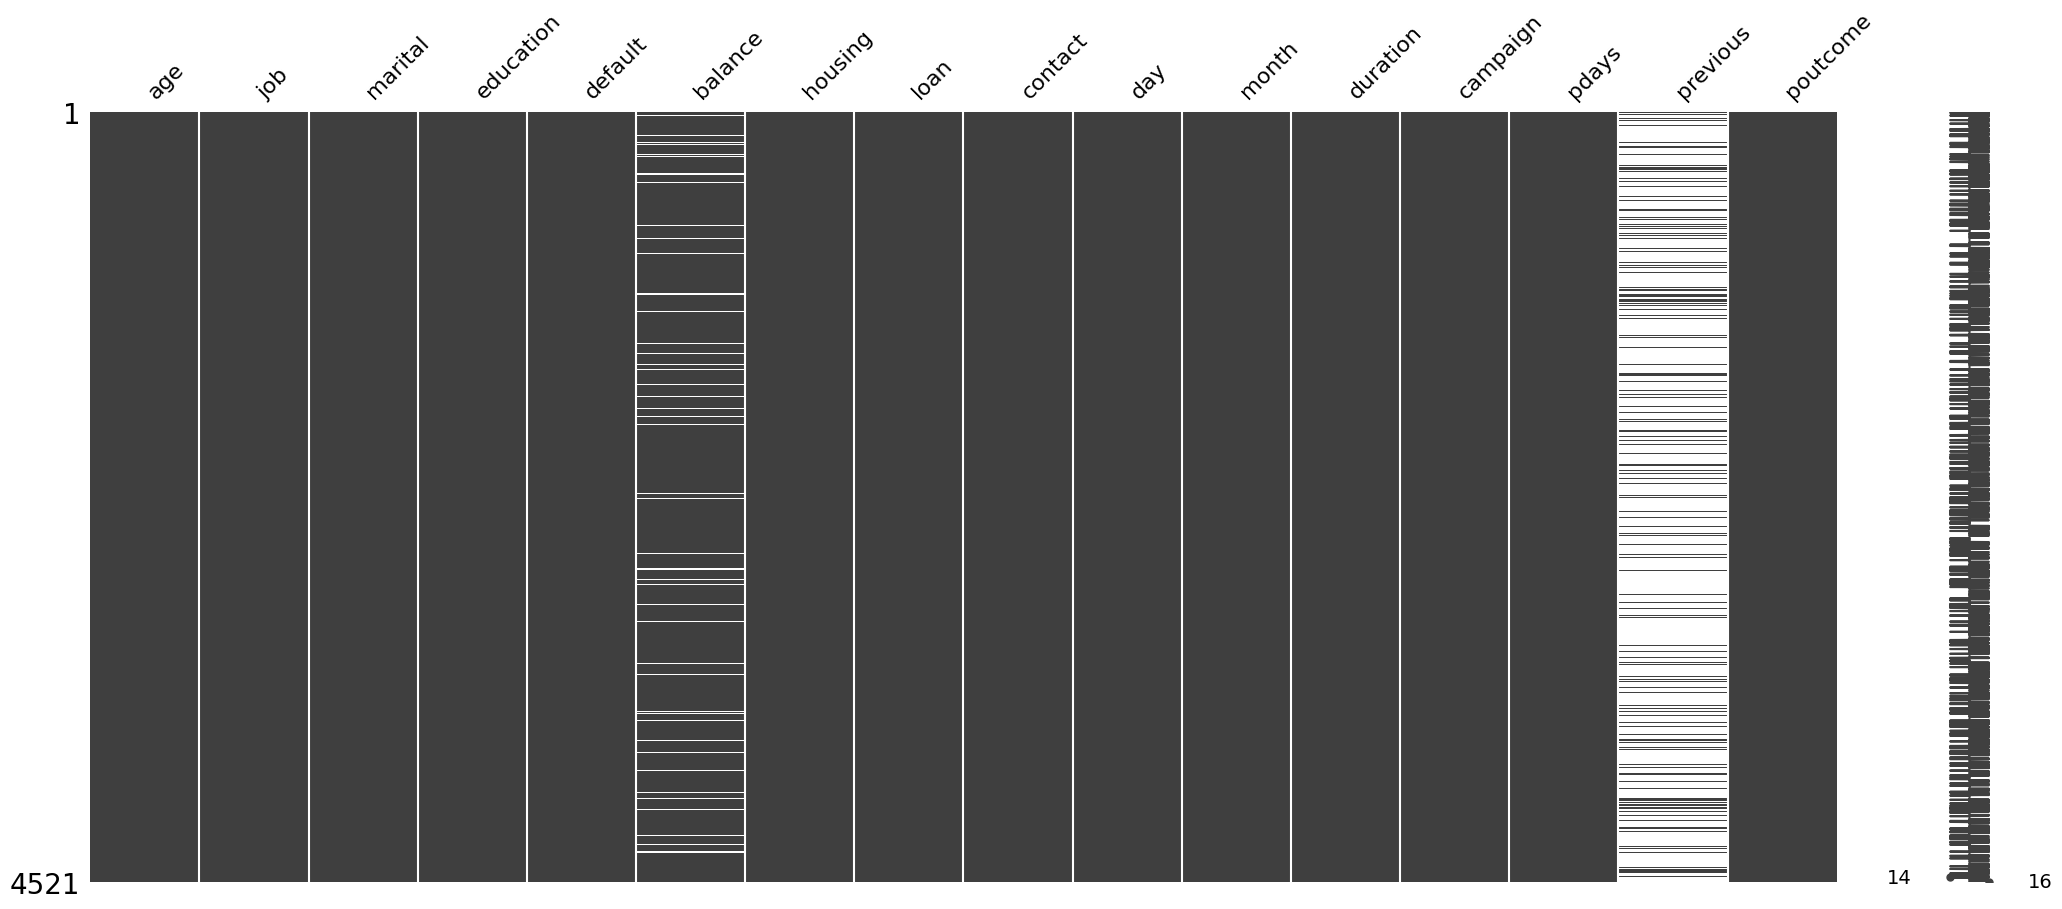

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

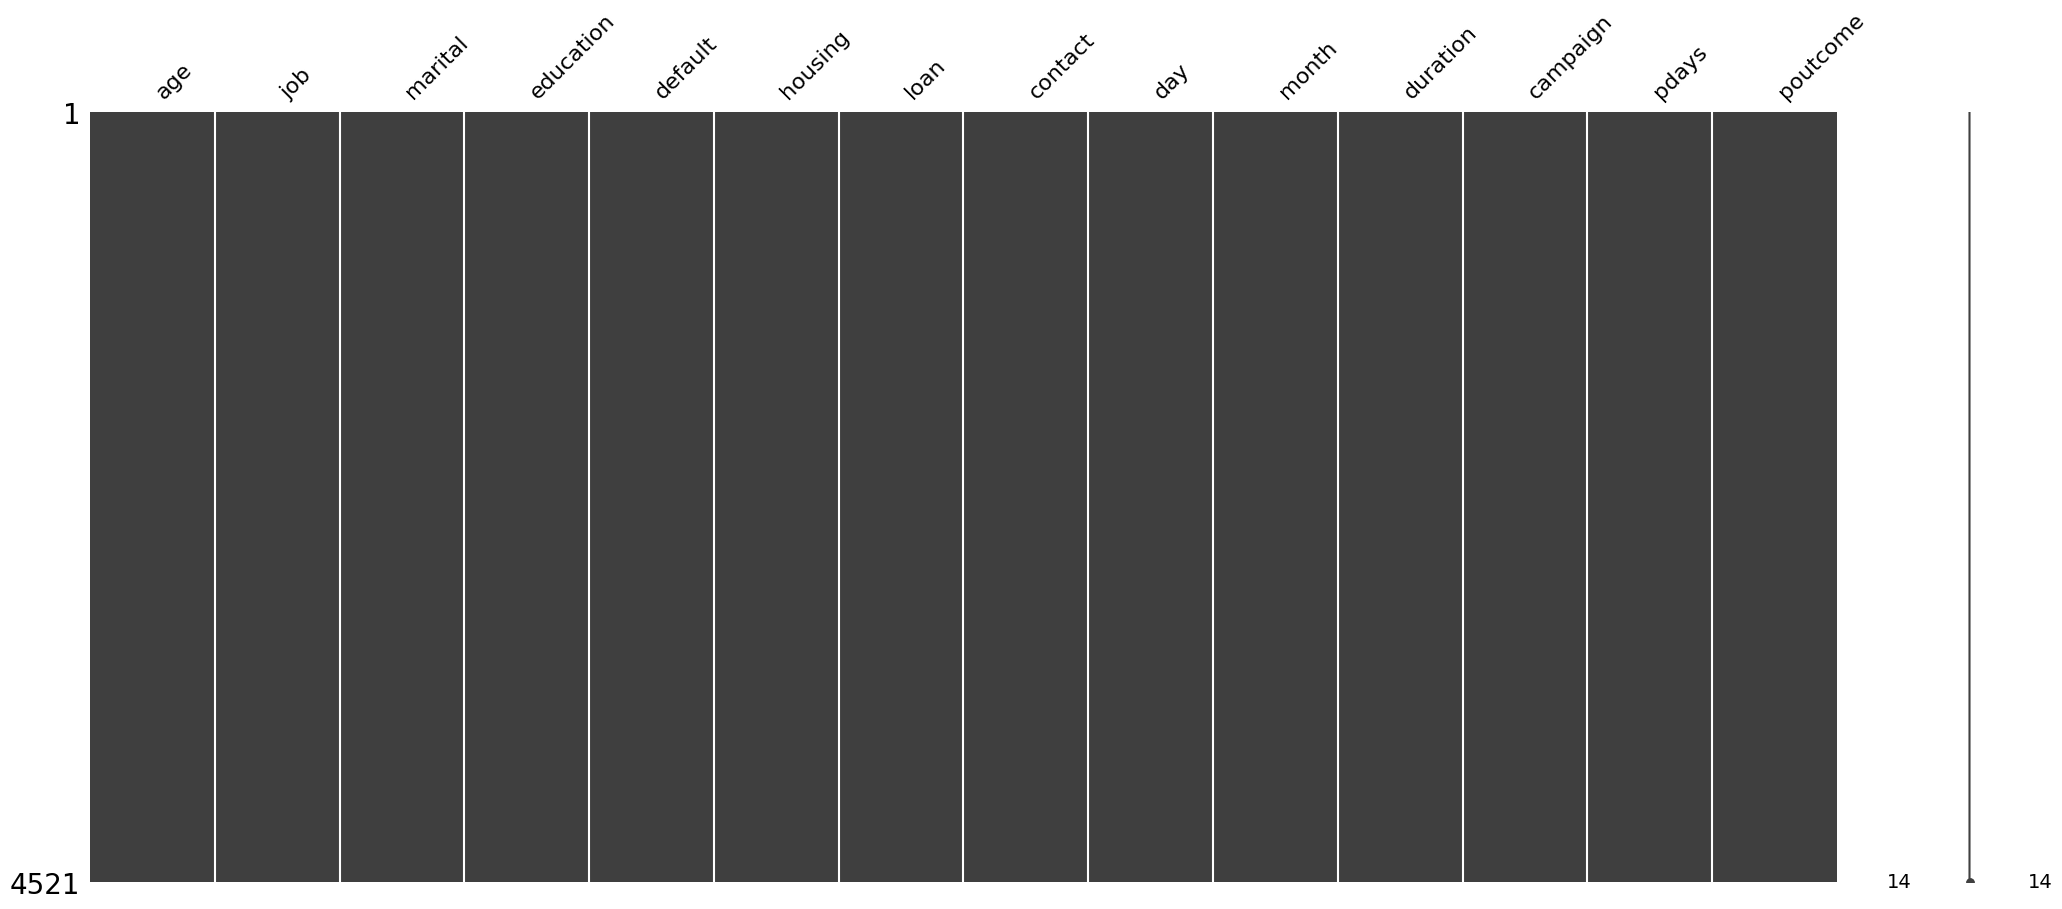

In [ ]:
# removendo as colunas 'balance' e 'previous'
atributos.drop(['balance', 'previous'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['y'] = dataset['y']

# exibindo as primeiras linhas
datasetSemMissings.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,79,1,-1,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,220,1,339,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,185,1,330,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,199,4,-1,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,226,1,-1,unknown,no


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:16]
y = array[:,16]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:14]
y_sm = array[:,14]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## 5 - Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]

### *Separação do dataset em conjunto de treino e conjunto de teste com holdout*

Realizando a separação em bases de treino e teste por meio do método holdout efetuando a divisão 80% base de treino e 20% base de teste

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
x_ini = array[:,0:30]
y = array[:,30]
X_train, X_test, y_train, y_test = train_test_split(x_ini, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

IndexError: index 30 is out of bounds for axis 1 with size 17

### *Realizando processo de Feature Selection*

Foram testados os métodos de seleção univariada, eliminação de recursos de atributos e importância de atributos para realizar feature selection, sendo escolhido o método de seleção univariada com redução para 4 atributos que obteve um resultado satisfatório de acurácia nos modelos testados.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (x_ini, y) e obtém os atributos selecionados
fit = best_var.fit(x_ini, y)

# Reduz x_ini para os atributos selecionados em x
x = fit.transform(x_ini)

# Resultados
print('\nNúmero original de atributos:', x_ini.shape[1])
print('\nNúmero reduzido de atributos:', x.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:30])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:30]))

### *Realizando a validação cruzada*

Realizando a separação em 10 folds usando a validação cruzada.

In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 3 - Modelagem e Treinamento

### Criação e avaliação de modelos: linha base

Realizando a etapa de modelagem e inferência, definindo inicialmente uma semente global para essa célula de código, necessária para garantir a reprodutibilidade do código com os mesmos resultados. Como não sabemos de antemão quais algoritmos performarão bem nesse conjunto de dados, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia. Primeiramente, iremos avaliar os algoritmos Regressão Logística, KNN, Árvore de Classificação, Naive Bayes, SVM e Ensembles com a configuração padrão de hiperparâmetros da Scikit-Learn. O resultado médio da acurácia de cada modelo será impresso, bem como um gráfico boxplot sumarizando os resultados das dez execuções (correspondentes aos dez folds)

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Em seguida, vamos repetir esse processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original:

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Analisando os resultados, verificamos que, considerando a acurácia média, o modelo treinado com Regressão Logística através da validação cruzada com os dados padronizados apresentou os melhores resultados (98% de acurácia média e desvio-padrão de 2%), indicando que possivelmente seguiríamos com ele como escolha de algoritmo. Nesse caso, já poderíamos contruir um novo modelo, treinado com toda a base de treino.

### Otimização dos hiperparâmetros

Agora iremos utilizar a biblioteca Grid Search para executar a otimização dos hiperparâmetros do algoritmo com melhores resultados pela métrica acurácia que foi a Regressão Logística com os dados padronizados a fim de buscar resultados ainda melhores para este algoritmo. Para tal, tentaremos as penalidades  "l1" para regularização L1 (Lasso) e "l2" para regularização L2 (Ridge), o parâmetro C que indica o inverso da força de regularização (valores menores especificam uma regularização mais forte. Um valor maior de C indica uma menor regularização) com os valores 0.1, 1 e 10, o parâmetro solver, algoritmo usado para otimizar parâmetros, com as opções liblinear e saga e com número máximo de iterações permitidas para a convergência do otimizador com os valores 100, 200 e 300.

In [ ]:
# Tuning da Regressão Logística com dados padronizados

np.random.seed(7) # definindo uma semente global para este bloco

# Definir o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Passo de pré-processamento para padronizar os dados
    ('logistic', LogisticRegression())  # Modelo de regressão logística
])

# Definir os parâmetros para ajustar
parameters = {
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [0.1, 1, 10],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__max_iter': [100, 200, 300],
}

# Criar o objeto GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring=scoring, cv=kfold)

# Ajustar o modelo aos dados
grid.fit(X_train, y_train)

# Melhor combinação de parâmetros
best_params = grid.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Acurácia do modelo com os melhores parâmetros
best_accuracy = grid.best_score_
print("Acurácia com os melhores parâmetros:", best_accuracy)

Conseguimos melhorar ainda mais um pouquinho acurácia do algoritmo de regressão logística para o dataset padronizado que já era muito boa e podemos então seguir para etapa de finalização do modelo utilizando os melhores parâmetros para este algorítmo.

## 4 - Finalização do Modelo

Vamos agora finalizar o modelo escolhido com o que alcançou os melhores resultados que foi a regressão logística com os dados padronizados. A seguir, finalizaremos esse modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada e utilizando os melhores parâmetros identificados na etapa anterior), e faremos predições para o conjunto de dados de teste que foi separado logo no início da prática, a fim de confirmarmos os resultados. Primeiro, iremos realizar a padronização dos dados de entrada. Depois, treinaremos o modelo e exibiremos a acurácia de teste.

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200,C=1,penalty='l2',solver='saga')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

Por meio do conjunto de teste, verificamos que alcançamos acurácia de 97,4% em dados não vistos. Esse resultado foi bastante próximo da nossa avaliação anterior da regressão logística, que alcançou acurácia média de 98%. Como temos um problema de classificação binária e um conjunto de dados balanceados, sem prevalência de uma classe em relação a outra, a métrica de acurácia
é adequada para avaliar o modelo de regressão logística e podemos inferir que não há problemas de overfitting ou underfitting. Valores semelhantes à acurácia de teste são esperados quando esse modelo estiver executando em produção e fazendo predições para novos dados.

Vamos agora preparar o modelo para utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

In [ ]:
scaler = StandardScaler().fit(x) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(x) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)